In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [4]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [5]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [6]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    pred = np.dot(tx, w)
    return (1/(2*len(tx))) *  np.sum((y - pred)** 2)
    

# 2. Grid Search

Fill in the function `grid_search()` below:

In [7]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    rows, column = np.indices((len(grid_w0), len(grid_w1)))
    for r, c in zip(rows.ravel(), column.ravel()): 
        weights = np.array([grid_w0[r], grid_w1[c]])
        losses[r][c] = compute_loss(y, tx, weights)
    
    
    return losses

grid_search(y, tx, np.arange(1, 3), np.arange(1, 3))

array([[2706.46307832, 2694.48336589],
       [2634.66915632, 2622.68944388]])

In [8]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Let us play with the grid search demo now!

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.581 seconds


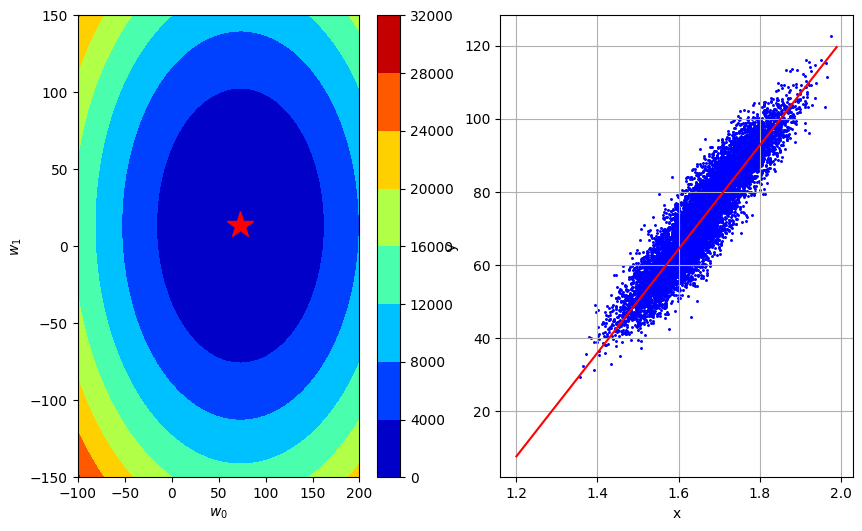

In [9]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [10]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    error = y -  tx.dot(w)
    return -1/len(tx) * np.dot(tx.T, error)

compute_gradient(y, tx, np.array([100,20])) 

array([26.706078  ,  6.52028757])

Please fill in the functions `gradient_descent` below:

In [11]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        g = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        
        w = w - gamma*g

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [12]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.2367127591674, w0=73.29392200210516, w1=13.479712434988958
GD iter. 1/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
GD iter. 2/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
GD iter. 3/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
GD iter. 4/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
GD iter. 5/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
GD iter. 6/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
GD iter. 7/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
GD iter. 8/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
GD iter. 9/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
GD iter. 10/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
GD iter. 11/49: loss=15.385887868829402, w0=73.29392200210519, w1=13.479712

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [15]:
import random

def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    n = random.randint(0,len(tx))
    return tx[n] * (y[n] - tx[n] @ w) 

print(compute_stoch_gradient(y, tx, np.array([1,2])))

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        g = compute_stoch_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        
        w = w - gamma*g

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

[84.14250195 -4.39652381]


In [16]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/99: loss=2792.2367127591674, w0=-8.9752511423464, w1=-8.547278791719545
SGD iter. 1/99: loss=3642.0884840554536, w0=-16.874236185156875, w1=-9.50526872649882
SGD iter. 2/99: loss=4344.688942807361, w0=-29.566494559591334, w1=-29.555284363084148
SGD iter. 3/99: loss=6231.5240101967765, w0=-40.51103837571519, w1=-31.7996958639345
SGD iter. 4/99: loss=7516.28279911777, w0=-57.28071975389754, w1=-51.778022139119656
SGD iter. 5/99: loss=10669.540383595457, w0=-71.51620082450891, w1=-55.867924423707805
SGD iter. 6/99: loss=12904.919093341197, w0=-88.76013889256242, w1=-64.09169494183953
SGD iter. 7/99: loss=16154.806835306083, w0=-103.8781891594499, w1=-61.84595528997555
SGD iter. 8/99: loss=18547.34248369592, w0=-125.0013904703052, w1=-69.65224206023942
SGD iter. 9/99: loss=23131.36229123262, w0=-150.06809725529536, w1=-83.81226120634236
SGD iter. 10/99: loss=29693.545778753258, w0=-173.6799084810903, w1=-84.26529131257284
SGD iter. 11/99: loss=35290.465238445344, w0=-211.499296

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=1, min=1), Output()), _dom_classes=('widget…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [19]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [20]:
y.shape, tx.shape

((202,), (202, 2))

In [22]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.847464098448484, w1=7.724426406192441
GD iter. 1/49: loss=318.282124701595, w0=67.401703327983, w1=10.041754328050121
GD iter. 2/49: loss=88.6423556165126, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/49: loss=67.97477639885521, w0=73.46785662750146, w1=10.945512217574594
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=65.93222021235334, w0=74.05160722578589, w1=11.03248153448191
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225756, w1=11.034889001593537
GD iter

In [23]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [115]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    # print(np.sign(y  - tx.T @ w).shape)
    # return (np.sign(y  - tx @ w)) @ (-tx)


    # if all(np.sign(error) == 0): 
        # print('NON DIFFERENTIABLE')

    return 1/len(tx) * np.sign(y -  tx @ w) @ (-tx)

In [116]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        g = compute_subgradient_mae(y, tx, w)
        loss = np.sum(np.absolute(y - tx @ w)) 
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        w = w - g * gamma

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [117]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=14961.696782695128, w0=0.7000000000000004, w1=7.625844400394043e-16
SubGD iter. 1/499: loss=14820.296782695128, w0=1.4000000000000008, w1=1.5251688800788087e-15
SubGD iter. 2/499: loss=14678.896782695127, w0=2.1000000000000014, w1=2.287753320118213e-15
SubGD iter. 3/499: loss=14537.496782695125, w0=2.8000000000000016, w1=3.0503377601576174e-15
SubGD iter. 4/499: loss=14396.096782695127, w0=3.5000000000000018, w1=3.812922200197022e-15
SubGD iter. 5/499: loss=14254.69678269513, w0=4.200000000000002, w1=4.575506640236426e-15
SubGD iter. 6/499: loss=14113.296782695128, w0=4.900000000000002, w1=5.3380910802758305e-15
SubGD iter. 7/499: loss=13971.896782695127, w0=5.600000000000002, w1=6.100675520315235e-15
SubGD iter. 8/499: loss=13830.496782695125, w0=6.3000000000000025, w1=6.863259960354639e-15
SubGD iter. 9/499: loss=13689.096782695127, w0=7.000000000000003, w1=7.625844400394044e-15
SubGD iter. 10/499: loss=13547.696782695128, w0=7.700000000000003, w1=8.3884288404

In [118]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [145]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        # n = random.randint(0,len(tx) -1)

        # print(y[n], tx[n] @ w)

        elems = np.random.randint(0, len(tx), 10)
        y_batch = y[elems]
        tx_batch = tx[elems]

        g = compute_subgradient_mae(y_batch, tx_batch,  w)
        # g = 1/len(tx) * np.sign(y[n] -  tx[n] @ w) * (-tx[n])
        loss = compute_loss(y_batch, tx_batch,  w)
        
        w = w - gamma * g
        
        ws.append(w)
        losses.append(loss)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [146]:
# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.9
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/999: loss=2114.6092183724204, w0=0.9, w1=-0.5415039882502115
SubSGD iter. 1/999: loss=2491.538209173511, w0=1.8, w1=-0.8986849093073243
SubSGD iter. 2/999: loss=2678.700756894944, w0=2.7, w1=-0.8948155175048474
SubSGD iter. 3/999: loss=2992.2592285851165, w0=3.6, w1=-0.5415351254530371
SubSGD iter. 4/999: loss=2484.2996694630883, w0=4.5, w1=-0.5444670487029443
SubSGD iter. 5/999: loss=2043.473848935012, w0=5.4, w1=-0.6242162361093995
SubSGD iter. 6/999: loss=2638.302897621204, w0=6.300000000000001, w1=-0.5799759249661931
SubSGD iter. 7/999: loss=2397.1266790586506, w0=7.200000000000001, w1=-0.5034094784186713
SubSGD iter. 8/999: loss=2455.125417966886, w0=8.100000000000001, w1=-0.2238613175207767
SubSGD iter. 9/999: loss=2349.506733255621, w0=9.000000000000002, w1=-0.03821227366290106
SubSGD iter. 10/999: loss=2220.961430930819, w0=9.900000000000002, w1=0.19497455915949233
SubSGD iter. 11/999: loss=2459.7926379114383, w0=10.800000000000002, w1=0.46003830034555593
SubSGD 

In [147]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=1001, min=1), Output()), _dom_classes=('wid…

<function __main__.plot_figure(n_iter)>